# UNIVERSIDADE FEDERAL DO RIO DE JANEIRO
### Trabalho de Conclusão da  disciplina de Aprendizado de Máquina (EEL891)

Eduardo Fernando dos Santos Araujo   - DRE: 113049268

Graduação: Engenharia de Computação e Informação


## Introdução

Ao pedir a um comprador que descreva a casa dos seus sonhos, ele provavelmente não começará com a altura do teto do porão ou a proximidade de uma ferrovia leste-oeste. O conjunto de dados desta competição do Kaggle prova que muito mais influencia as negociações de preço do que simplesmente o número de quartos ou da presença de uma cerca.

Com 79 variáveis explicativas descrevendoquase todos os aspectos de casas residenciais em Ames, Iowa, esta competição traz como desafio a predição do preço final de cada casa.

Link da competição: [https://www.kaggle.com/c/house-prices-advanced-regression-technique]


## Importando bibliotecas


In [1605]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# Opção para mostrar todas as colunas
pd.options.display.max_columns = None



In [1592]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


## Vizualização dos dados

Olhamos nesse primeiro momento a disposição dos dados. Faremos primeiramente uma breve análise dos dados do dataset de treino. Trata-se de um dataset com 1460 registros e 80 colunas, com seus respectivos tipos descritos abaixo.

In [1598]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1540]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Variaveis númericas

Abaixo um mapa de calor, para que possamos vizualizar a correlação entre as váriaveis númericas entre si, e entre estas e o preço de venda.

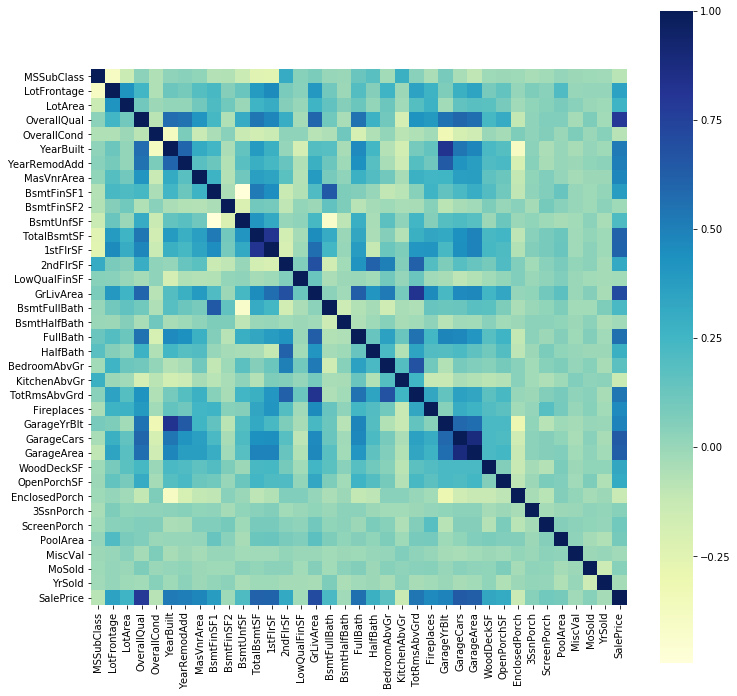

In [1602]:
corr = df_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu")


### Eliminação de outliers

Nota-se a presença de alguns outliers, em especial no gráfico de SalePrice por GrLivArea, onde 2 imóveis com áreas enormes estão com um preço muito baixo, o que estava prejudicando as predições. Optei por remover esses dois registros.

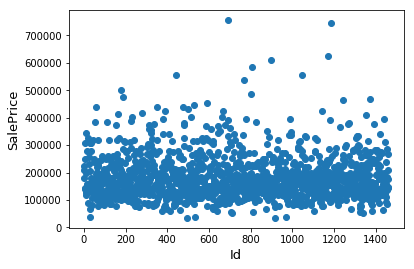

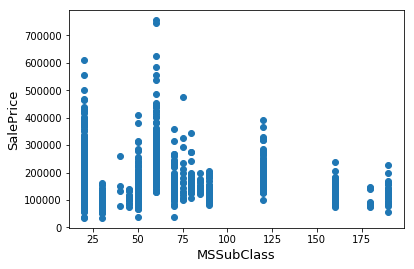

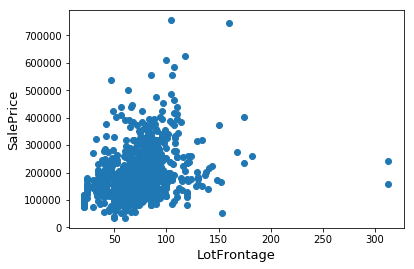

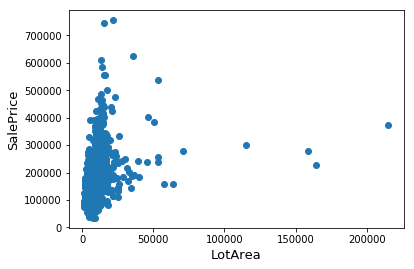

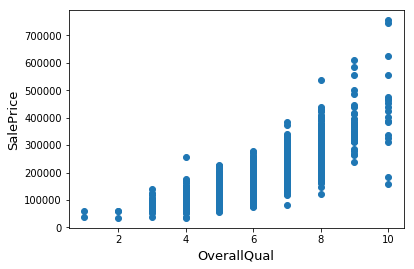

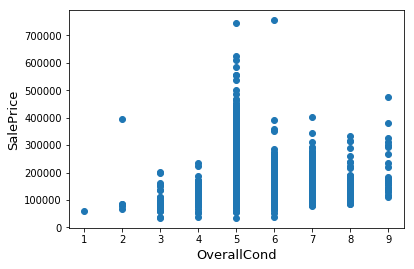

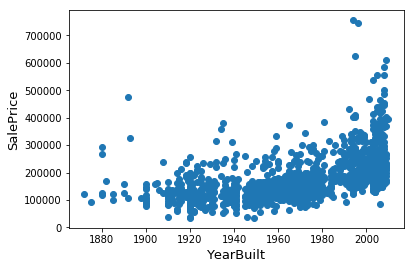

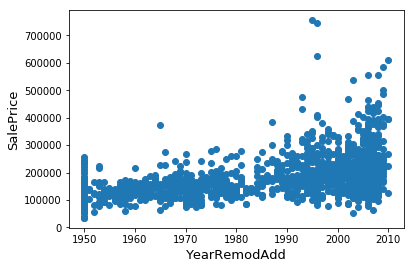

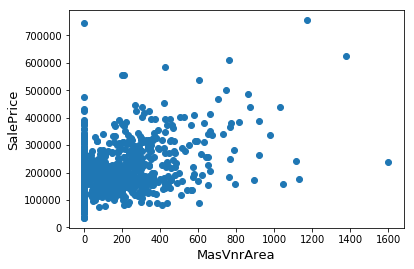

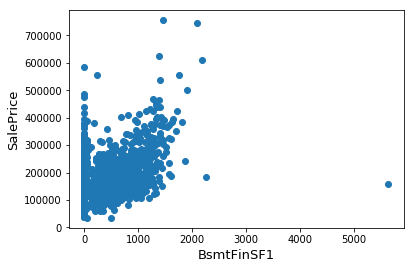

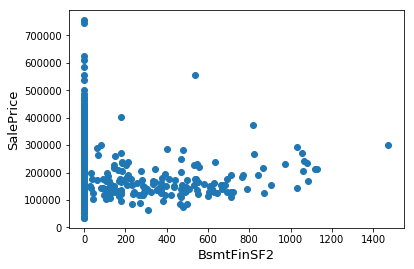

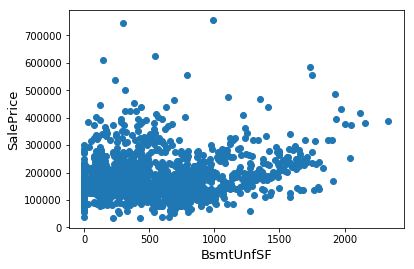

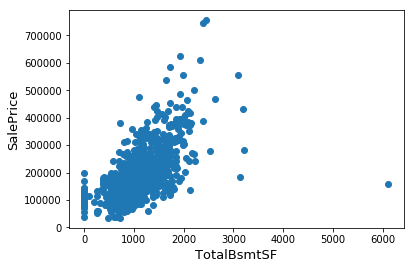

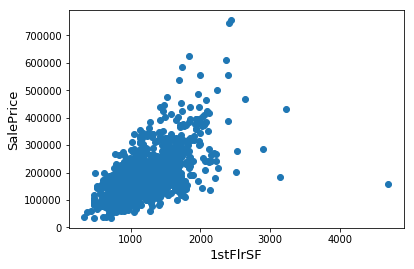

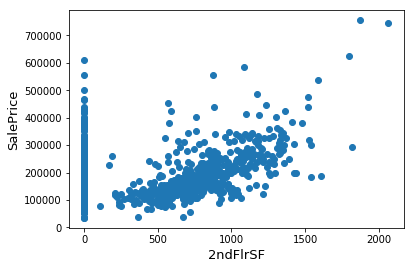

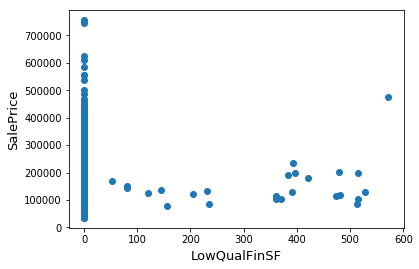

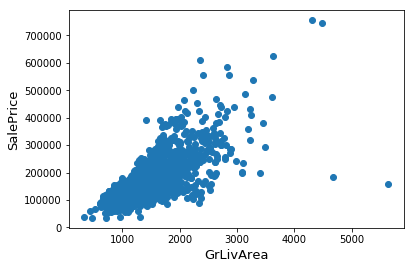

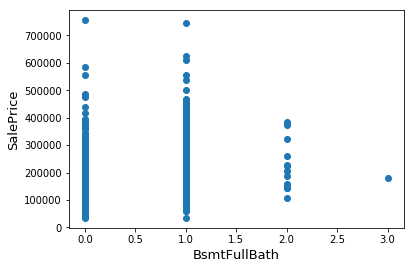

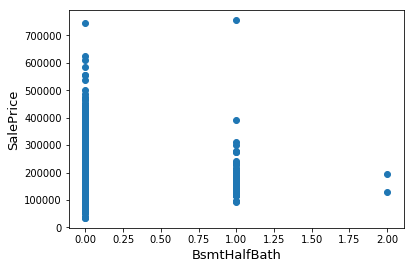

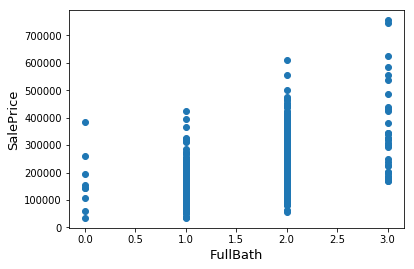

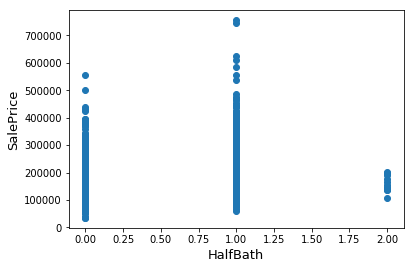

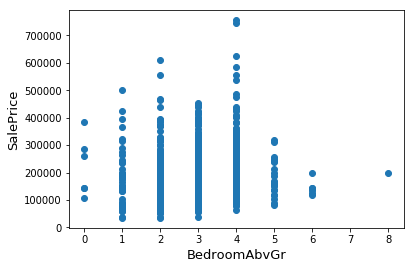

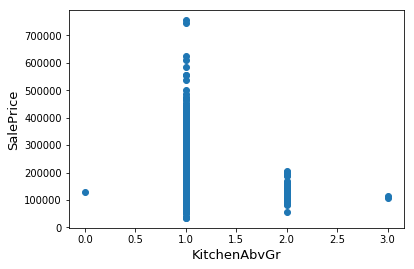

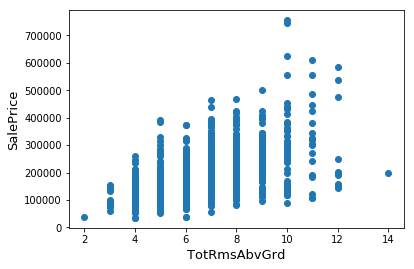

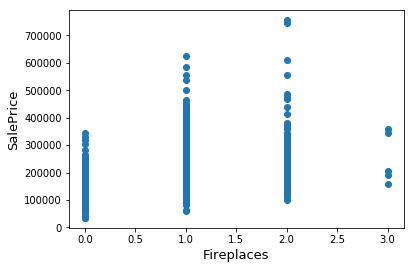

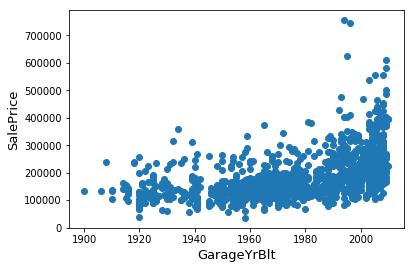

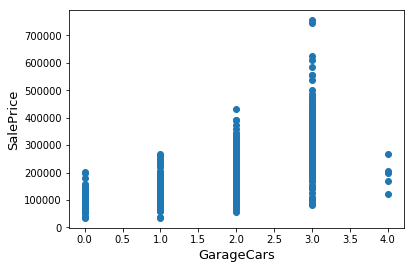

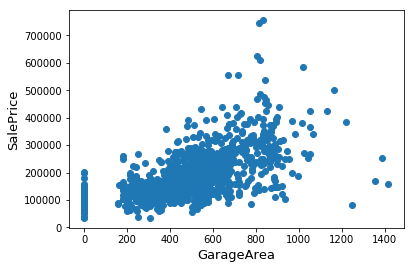

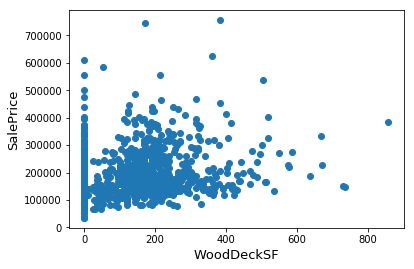

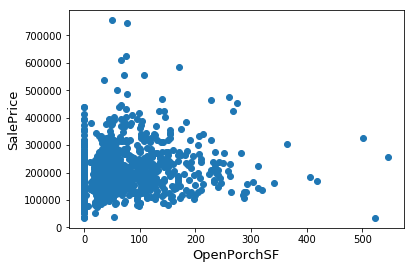

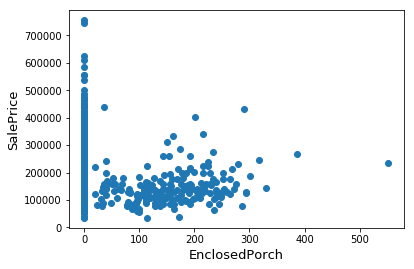

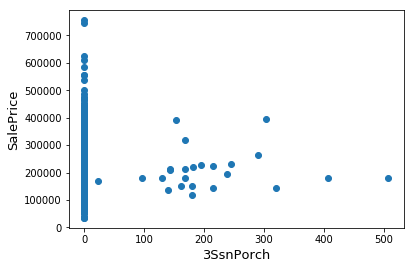

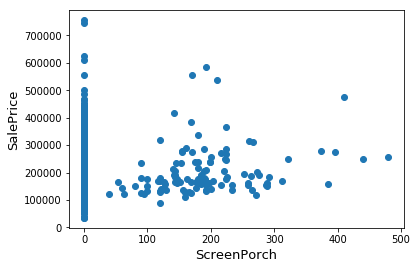

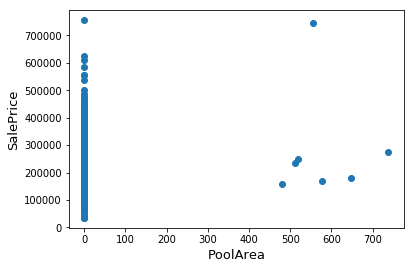

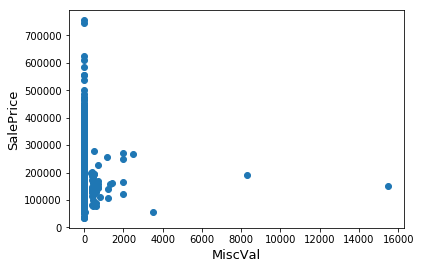

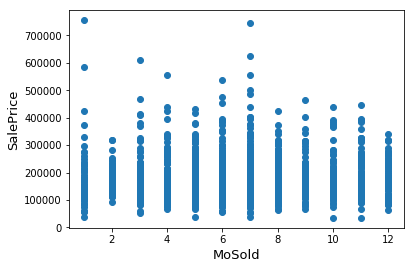

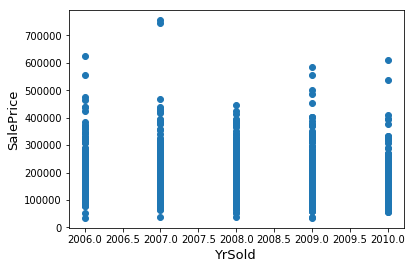

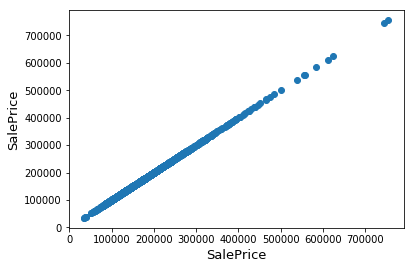

In [1541]:
for column in (list(df_train.select_dtypes(include = ['int64', 'float64']).columns)):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[column], y = df_train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.show()


In [1542]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

### Atribuição do target e eliminação de colunas desnecessáriaas

In [1543]:
y = df_train['SalePrice']
df_train = df_train.drop(['SalePrice'], axis=1)

# Removendo colunas desnecessárias
df_train.drop(['Id'], axis=1,inplace=True)
df_test.drop(['Id'], axis=1,inplace=True)

# Separação de colunas catégoricas de númericas
categorical_columns = list(df_train.select_dtypes(include = ['object']).columns)
numeric_columns = list(df_train.select_dtypes(include = ['int64', 'float64']).columns)


### Preenchendo valores faltantes

Colunas numéricas com dados faltantes:
    - LotFrontage: Linear feet of street connected to property
    - GarageYrBlt: Year garage was built
    - MasVnrArea: Masonry veneer area in square feet
    - BsmtHalfBath: Basement half bathrooms
    - BsmtFullBath: Basement full bathrooms

In [1544]:
df_train[numeric_columns].isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
YrSold            0
BsmtFinSF2        0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
TotalBsmtSF       0
BsmtUnfSF         0
dtype: int64

In [1545]:
df_test[categorical_columns].isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
dtype: int64

Nota-se que a coluna 'GarageYrBlt', assim como outras colunas relacionadas, recebe NaN sempre que a casa não possui garagem, portanto, preencheremos seus respectivos valores faltantes do ano com 0.

In [1546]:
df_train[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']][df_train['GarageYrBlt'].isnull()].head(15)


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


Estratégia de preenchimento de dados faltantes:
    - LotFrontage: Como a área de cada rua conectada à propriedade da casa provavelmente tem uma área semelhante a outras casas em sua vizinhança, podemos preencher os valores perdidos pela LotFrontage mediana do bairro.
    - GarageYrBlt: Preencheremos com 0, como explicado acima.
    - MasVnrArea: NA provavelmente significa que não há folheado de alvenaria para essas casas, preencheremos com 0 nesses casos.
    - BsmtFullBath e BsmtFullBath: NA provavelmente significa que não possui esse tipo de banheiro, portanto, preencheremos com 0.

In [1547]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_train['LotFrontage'].median())
df_test[numeric_columns] = df_test[numeric_columns].fillna(0)


## Dados Faltantes Categóricos

Observa-se a presença de valores faltantes em algumas colunas categóricas. Tentei fazer o preenchimento utilizando técnicas como: substituição por um valor randômico, substituição por uma palavra que indicasse inexistência, criação de uma coluna auxiliar (com 0 ou 1) para indicar que o registro da váriavel foi ou não preenchido. Entretanto, com nenhum dos métodos os resultados dos preditores melhoraram, portanto, decidi não fazê-los.

In [1514]:
df_train[categorical_columns].isnull().sum().sort_values(ascending=False).head(20)


PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
dtype: int64

In [ ]:
'''
# Função que substitui NA com uma amostra randomica dos labels e pode adicionar ou não
# uma váriavel que indica ausência de valor
def impute_na(df_train, df_test, variable, hasManyMissingValues):
    if(hasManyMissingValues):
        # add váriavel adicional que indica ausência de valor
        df_train[variable+'_NA'] = np.where(df_train[variable].isnull(), 1, 0)
        df_test[variable+'_NA'] = np.where(df_test[variable].isnull(), 1, 0)
  
    df_train[variable+'_random'] = df_train[variable]
    df_test[variable+'_random'] = df_test[variable]
    
    random_sample_train = df_train[variable].dropna().sample(df_train[variable].isnull().sum(), random_state=0, replace=True)
    random_sample_test = df_train[variable].dropna().sample(df_test[variable].isnull().sum(), random_state=0,replace=True)
    
    random_sample_train.index = df_train[df_train[variable].isnull()].index
    random_sample_test.index = df_test[df_test[variable].isnull()].index
    
    df_train.loc[df_train[variable].isnull(), variable+'_random'] = random_sample_train
    df_test.loc[df_test[variable].isnull(), variable+'_random'] = random_sample_test
        
    df_train.drop([variable], axis=1, inplace=True)
    df_test.drop([variable], axis=1, inplace=True)
        
    df_train.rename(columns={variable+'_random': variable}, inplace=True)
    df_test.rename(columns={variable+'_random': variable}, inplace=True)
    
for variable in categorical_columns:
    if(df_train[variable].isnull().sum()>500):
        impute_na(df_train, df_test, variable, True)
'''

In [ ]:
'''
# Substitui NA com o label mais frequente
def impute_na(df_train,df_test, variable):
    most_frequent_category = df_train.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    df_train[variable].fillna(most_frequent_category, inplace=True)
    df_test[variable].fillna(most_frequent_category, inplace=True)

for variable in categorical_columns:
    if(df_train[variable].isnull().sum()<500):
        impute_na(df_train, df_test, variable)
'''

In [ ]:
'''
# Preenche os dados faltantes com None
for col in categorical_columns:
    df_train[col] = df_train[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')
'''


### Normalização das variáveis númericas

In [1548]:
from sklearn.preprocessing import StandardScaler


categorical_columns = list(df_train.select_dtypes(include = ['object']).columns)
numeric_columns = list(df_train.select_dtypes(include = ['int64', 'float64']).columns)

sc_X = StandardScaler()
df_all_data = pd.concat([df_train[numeric_columns],df_test[numeric_columns]],copy=False)
sc_X.fit(df_all_data[numeric_columns])
df_train[numeric_columns] = sc_X.fit_transform(df_train[numeric_columns])
df_test[numeric_columns]   = sc_X.transform(df_test[numeric_columns])

sc_y = StandardScaler()
y = sc_y.fit_transform(y.values.reshape(-1, 1))

/home/eduardo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Encoding de váriaveis categóricas

Aqui considerei o encode das váriaveis com texto todas como nominais (ou categóricas), desconsiderando as ordinais, pois ao tentar realizar uma possível ordenação entre os labels, os preditores tiveram um pior resultado. 

Também não fiz a eliminação de uma das colunas em cada váriavel ao fazer o OneHotEncoder, pois, segundo meus estudos, isso pode diminuir a perfomance de alguns preditores, além de ser prejudicial numa etapa seguinte de seleção de features, onde a coluna eliminada poderia ser a mais imporante, sem contar que a referência à coluna faltante também poderia ser perdida.


In [1549]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing

df_train_temp = pd.DataFrame()
df_test_temp = pd.DataFrame()

df_train = df_train.reset_index(drop=True)

num_linhas_treino = df_train.shape[0]

categorical_columns = list(df_train.select_dtypes(include = ['object']).columns)
numeric_columns = list(df_train.select_dtypes(include = ['int64', 'float64']).columns)

for column in categorical_columns:
    df_all_data = pd.DataFrame()
    df_all_data[column] = pd.concat([df_train[column],df_test [column]],copy=False)    
    df_all_data[column] = df_all_data[column].astype(str, copy = False)

    # fit labels
    label_enc = preprocessing.LabelEncoder() 
    label_enc.fit(df_all_data[column])
    
    # transform labels
    column_label_encoded = label_enc.transform(df_all_data[column]).reshape(-1,1) 
    df_all_data = None
    
    # fit e transform usando OneHotEncoder
    one_hot_enc = OneHotEncoder(dtype=np.uint8, sparse=True)
    column_transformed = one_hot_enc.fit_transform(column_label_encoded)
    
    # particionando resultado
    train_column_transformed = pd.DataFrame(column_transformed[:num_linhas_treino].toarray())
    train_column_transformed = train_column_transformed.add_prefix(column+'_')
    test_column_transformed  = pd.DataFrame(column_transformed[num_linhas_treino:].toarray())
    test_column_transformed = test_column_transformed.add_prefix(column+'_')
    column_transformed = None
    
    
    #df_testa_temp = df_testa_temp.join(pd.DataFrame(df_train[column].str.get_dummies().values[:, 1:]), lprefix=column+'_')
    #print(df_testa_temp)
    df_train_temp = pd.concat([df_train_temp, train_column_transformed], axis=1)
    df_test_temp = pd.concat([df_test_temp, test_column_transformed], axis=1)
    

In [1520]:
#categories = {
#'Alley':['Grvl', 'Pave','NA'],

#LotShape':['Reg', 'IR1', 'IR2', 'IR3'],
#'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'],
#'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'],
#'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
#'LandSlope': ['Gtl', 'Mod', 'Sev'],
#'Condition1' : ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],
#'Condition2' : ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],
#'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
#'ExterQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
#'ExterCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
#'BsmtQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
#'BsmtExposure': ['Gd', 'Av', 'Mn', 'No', 'NA'],
#'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
#'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
#'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
#'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
#'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],
#'FireplaceQu': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
#'GarageType': ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'],
#'GarageFinish': ['Fin', 'RFn', 'Unf', 'NA'],
#'GarageQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
#'GarageCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
#'PavedDrive': ['Y', 'P', 'N'],
#'PoolQC': ['Ex', 'Gd', 'TA', 'Fa', 'NA'],
#'Fence': ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA']
#             }

#df_all_data = pd.DataFrame()
#num_linhas_treino = df_train.shape[0]

#for key, value in categories.items():
#    df_all_data[key] = pd.concat([df_train[key],df_test [key]],copy=False)    
#    df_all_data[key] = df_all_data[key].replace(value, np.arange(len(categories[key])))
#    df_train[key] = df_all_data[key][:num_linhas_treino]
#    df_test[key] = df_all_data[key][num_linhas_treino:]



In [1550]:
#Juntando váriaveis categóricas com numéricas
df_test_temp = pd.concat([df_test_temp,df_test[numeric_columns] ], axis=1,ignore_index=True)
df_train_temp = pd.concat([df_train_temp,df_train[numeric_columns]], axis=1,ignore_index=True)

In [1551]:
df_train_temp.shape,df_test_temp.shape

((1458, 310), (1459, 310))

### Realizando Feature Selection

Das 310 colunas, selecionamos aqui as 200 com melhor predição com o regressor SVR.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
#df = pd.DataFrame(dataset_train)

sfs1 = SFS(SVR(C=55, kernel='poly', tol= 0.09, epsilon=0.05, coef0=0.04), k_features=200,forward=True,floating=False,verbose=2,scoring='r2',cv=3, n_jobs=-1)
sfs1=sfs1.fit(np.array(df_train_temp), y.ravel())
features_to_keep = df_train_temp.columns[list(sfs1.k_feature_idx_)]
features_to_keep

In [1553]:
features_to_keep= [0, 1, 2, 3, 5, 7, 8, 9, 16, 17, 18, 19, 21, 23, 24, 25, 28, 29, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 49, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 80, 82, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 104, 105, 108, 109, 113, 115, 116, 121, 123, 125, 128, 130, 132, 134, 137, 140, 143, 145, 147, 150, 151, 152, 155, 156, 158, 159, 160, 162, 163, 165, 166, 167, 169, 172, 173, 175, 176, 177, 178, 179, 180, 182, 183, 185, 187, 189, 190, 192, 193, 194, 196, 197, 198, 199, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 221, 222, 224, 225, 228, 229, 231, 232, 235, 236, 237, 238, 239, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 257, 258, 260, 261, 262, 264, 265, 266, 267, 269, 272, 273, 275, 276, 277, 278, 279, 282, 283, 284, 285, 286, 289, 294, 297, 299, 300, 301, 302, 305, 306]

In [1554]:
df_train_temp = df_train_temp[features_to_keep]
df_test_temp = df_test_temp[features_to_keep]

In [1555]:
df_train_temp.shape,df_test_temp.shape

((1458, 200), (1459, 200))

## Regularização Lasso

Também tentei utilizar regularização nesse processo de escolha de features, porém os resultados pioraram muito. Optei por não utililá-la.

In [ ]:
'''
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.feature_selection import SelectFromModel

sel_ = SelectFromModel(LassoCV(),threshold=0.25)
sel_.fit(df_train_temp, y)
# make a list with the selected features and print the outputs
selected_feat = df_train_temp.columns[(sel_.get_support())]

# removed correlated  features
df_train_temp.drop(labels=selected_feat, axis=1, inplace=True)
df_test_temp.drop(labels=selected_feat, axis=1, inplace=True)
 
df_train_temp.shape, df_train_temp.shape
'''


## Métodos de Filtragem

Nessa etapa fiz a eleminação de colunas constantes, colunas duplicadas e colunas altamente correlacionadas (correlação > 0.9) em busca de melhorar o desempenho das predições e reduzir ainda mais a dimensionalidade.

In [1556]:
# remove constant features
constant_features = [
    feat for feat in df_train_temp if df_train_temp[feat].std() == 0
]

df_train_temp.drop(labels=constant_features, axis=1, inplace=True)
df_test_temp.drop(labels=constant_features, axis=1, inplace=True)
 
df_train_temp.shape, df_train_temp.shape


((1458, 193), (1458, 193))

In [1557]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(df_train_temp.columns)): 
    col_1 = df_train_temp.columns[i]
 
    for col_2 in df_train_temp.columns[i + 1:]:
        if df_train_temp[col_1].equals(df_train_temp[col_2]):
            duplicated_feat.append(col_2)
            
df_train_temp.drop(labels=duplicated_feat, axis=1, inplace=True)
df_test_temp.drop(labels=duplicated_feat, axis=1, inplace=True)
 
df_train_temp.shape, df_train_temp.shape

((1458, 190), (1458, 190))

In [1558]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(df_train_temp, 0.9)

# removed correlated  features
df_train_temp.drop(labels=corr_features, axis=1, inplace=True)
df_test_temp.drop(labels=corr_features, axis=1, inplace=True)
 
df_train_temp.shape, df_train_temp.shape



((1458, 185), (1458, 185))

## Estimadores

Abaixo alguns regressores testados durante o processo de obtenção das melhores predições para o problema. As escolha de hiperparametros se deu de forma empiríca, de fato testando melhores combinações. Utilizei também alguns métodos de Ensemble, como Adaboost, Bagging e Stacking, em busca de melhores resultados.

Para testar as predições com os dados de treino utilizei o cross validator, dividindo o dataset em 5 partes e fazendo a validação cruzada entre elas. 

### GradientBoostingRegressor

In [1570]:
results = []

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
regressor = GradientBoostingRegressor(random_state=2,n_estimators=650, learning_rate =0.1,loss='ls')

scores = cross_val_score(regressor, df_train_temp, y.ravel(), cv=5,verbose=1, n_jobs=-1)
print(scores)
print(np.mean(scores))
print(np.std(scores))
results.append(("%.4f" % np.mean(scores)))

[0.91834691 0.92767582 0.91352035 0.92333335 0.93027408]
0.9226301020799903
0.0060945485794722766


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


### XGBRegressor

In [1571]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
regressor = XGBRegressor(random_state=2, n_estimators=400, learning_rate=0.15)

scores = cross_val_score(regressor, df_train_temp, y.ravel(), cv=5,verbose=1, n_jobs=-1)
print(scores)
print(np.mean(scores))
print(np.std(scores))
results.append(("%.4f" % np.mean(scores)))

[0.92347782 0.91644152 0.90589513 0.92577146 0.9271744 ]
0.919752065149226
0.007850855111197161


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


### SVR

In [1573]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
regressor = SVR(C=55, kernel='poly', tol= 0.09, epsilon=0.04, coef0=0.05)
scores = cross_val_score(regressor, df_train_temp, y.ravel(), cv=5, n_jobs=-1, verbose=1)
print(scores)
print(np.mean(scores))
print(np.std(scores))
results.append(("%.4f" % np.mean(scores)))

[0.94532942 0.95037411 0.93719086 0.95305598 0.95356304]
0.9479026811538981
0.006100310526275993


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


### LGBMRegressor

In [1574]:
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
regressor = AdaBoostRegressor(LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11), loss='square')

scores = cross_val_score(regressor, df_train_temp, y.ravel(), cv=5, verbose=1)
print(scores)
print(np.mean(scores))
print(np.std(scores))
results.append(("%.4f" % np.mean(scores)))

[0.91542498 0.93234681 0.90663525 0.92095427 0.92130353]
0.9193329694647261
0.008394951014368048


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   55.9s finished


### RandomForestRegressor

In [1575]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(random_state=0,n_estimators=400)
scores = cross_val_score(regressor, df_train_temp, y.ravel(), cv=5,verbose=1)
print(scores)
print(np.mean(scores))
results.append(("%.4f" % np.mean(scores)))

[0.874428   0.92006258 0.87226889 0.88067449 0.8854182 ]
0.8865704309413129


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   30.7s finished


### MLPRegressor

In [1576]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(learning_rate='adaptive', solver='lbfgs',alpha=2.0, activation='logistic',random_state=0,
                        hidden_layer_sizes= (15 ))
scores = cross_val_score(regressor, df_train_temp, y.ravel(), cv=5, n_jobs=-1, verbose=1)
print(scores)
print(np.mean(scores))
print(np.std(scores))
results.append(("%.4f" % np.mean(scores)))

[0.92920945 0.95341328 0.92985195 0.94485621 0.93864407]
0.9391949901372112
0.009181676741535692


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


### KernelRidge

In [1577]:
from sklearn.kernel_ridge import KernelRidge
regressor = KernelRidge(alpha=0.035, kernel='polynomial', degree=3, coef0=0.1, gamma=0.01)

scores = cross_val_score(regressor, df_train_temp, y.ravel(), cv=5, n_jobs=-1, verbose=1)
print(scores)
print(np.mean(scores))
print(np.std(scores))
results.append(("%.4f" % np.mean(scores)))

[0.94285898 0.94136474 0.93776755 0.94566429 0.95364546]
0.9442602062230231
0.005339591346117186


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


### Ridge

In [1578]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor

regressor = BaggingRegressor(Ridge(alpha=15, solver='sparse_cg', random_state=0),
                             max_samples=1.0, max_features=1.0, bootstrap=False, bootstrap_features=True,
                             n_estimators=60)
scores = cross_val_score(regressor, df_train_temp, y.ravel(), cv=5, n_jobs=-1, verbose=1)
print(scores)
print(np.mean(scores))
print(np.std(scores))
results.append(("%.4f" % np.mean(scores)))

[0.90025712 0.92641726 0.88000915 0.89872579 0.8827937 ]
0.8976406030526889
0.016537341714757094


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


### KNN

In [1579]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=10)
scores = cross_val_score(regressor, df_train_temp, y.ravel(), cv=5, n_jobs=-1, verbose=1)
print(scores)
print(np.mean(scores))
print(np.std(scores))
results.append(("%.4f" % np.mean(scores)))

[0.84802141 0.86992358 0.80185989 0.82805515 0.81387493]
0.8323469952927228
0.02427668695612343


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


### Lasso

In [1580]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha =0.001, random_state=1)
scores = cross_val_score(regressor, df_train_temp, y.ravel(), cv=5, n_jobs=-1, verbose=1)
print(scores)
print(np.mean(scores))
print(np.std(scores))
results.append(("%.4f" % np.mean(scores)))

[0.90034207 0.93117017 0.90017755 0.90471156 0.89665711]
0.9066116889604683
0.01254216306301519


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


### Stacking

In [1581]:
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
import time

# Definindo estimadores da primeira camada
estimators_L1 = [
    GradientBoostingRegressor(random_state=2,n_estimators=650, learning_rate =0.1),
    KernelRidge(alpha=0.03, kernel='polynomial', degree=3, coef0=0.1, gamma=0.01),
    LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
]

# Definindo estimador final
final_estimator = KernelRidge(alpha=0.03, kernel='polynomial', degree=3, coef0=0.1, gamma=0.01)

start = time.time()


# Criando Stacking Regressor 
regressor = StackingRegressor(regressors=estimators_L1, 
                       meta_regressor=final_estimator)

scores = cross_val_score(regressor, df_train_temp, y.ravel(), cv=5, verbose=1)
end = time.time()

print(scores)
print(np.mean(scores))
print(np.std(scores))
results.append(("%.4f" % np.mean(scores)))

[0.93711581 0.93943151 0.92825094 0.93987568 0.94658163]
0.9382511144521644
0.005911384828545507


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.4s finished


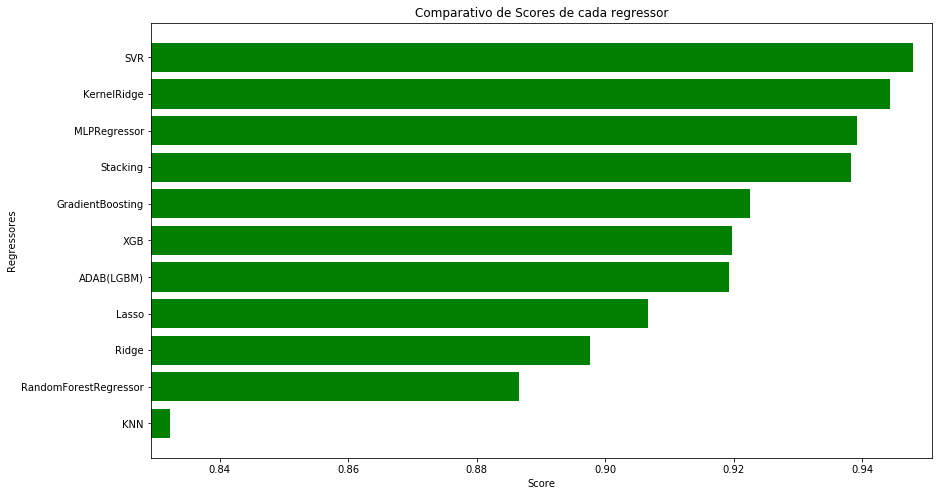

In [1590]:
results = list(np.float_(results))
data = pd.DataFrame({'Scores': results, 
                     'Regressores': ['GradientBoosting','XGB', 'SVR','ADAB(LGBM)','RandomForestRegressor','MLPRegressor', 'KernelRidge', 'Ridge', 'KNN', 'Lasso', 'Stacking']})
data.sort_values(by='Scores', inplace=True);

plt.figure(figsize=(14,8))
plt.barh(range(data.Scores.count()), data.Scores, color='g')

plt.title(u"Comparativo de Scores de cada regressor")
plt.xlabel("Score")
plt.ylabel('Regressores')
plt.yticks(range(len(results)), data.Regressores)
plt.xlim(min(results) - 0.003, max(results) + 0.003)

plt.show()

## Preditor Final

No preditor final, utilizei a média de dois preditores com altos valores de predição, o MLPRegressor e o SVR. Gerando ao final a submissão para o Kaggle.

In [1296]:
X_train = df_train_temp
y_train = y
X_test  = df_test_temp

regr = MLPRegressor(learning_rate='adaptive', solver='lbfgs',alpha=2.0, activation='logistic',random_state=0,
                        hidden_layer_sizes= (15 ))
regr2 = SVR(C=55, kernel='poly', tol= 0.09, epsilon=0.04, coef0=0.05)


# Treino
regr.fit(X_train, y_train.ravel()) 
regr2.fit(X_train, y_train.ravel()) 

# Predição      
y_pred = regr.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
    
y_pred2 = regr2.predict(X_test)
y_pred2 = sc_y.inverse_transform(y_pred2)

y_pred_final = 0.5*y_pred + 0.5*y_pred2

In [1308]:
df_test_item_id  = pd.read_csv('test.csv' , encoding='utf8')['Id'].head(y_pred.shape[0])
df_y_pred = pd.DataFrame(y_pred_final, columns = ['SalePrice'])
df_resultado = pd.concat([df_test_item_id,df_y_pred],axis =1)
df_resultado.to_csv('submission.csv', encoding='utf-8', index=False)

## Conclusão

Uma boa predição dos valores dos imóveis baseada em seus registros anteriores requer uma análise bastante crítica, sendo necessário entender o real significado de cada informação, entender como esses dados foram obtidos, porque alguns dados estão faltando e como fazer um preenchimento mais próximo da realidade, reconhecer e eliminar valores que são muito distoantes do comum, fazer a escolha das features que são de fato importantes para a predição do valor do imóvel, dentre outras etapas de um pré-processamento. 

Foi importante também avaliar como os resultados variam de estimador para estimador e como as escolhas dos hiperparametros se tornaram fundamentais para que um regressor alcançasse um score mais alto, com diferenças realmente significativas dependendo dos valores escolhidos. Além de verificar que muitas vezes combinar estimadores pode ser interessante para a obtenção de uma melhor predição.

Ao final, os valores preditos obtidos nos testes foram abaixo dos que obtive no treinamento, nos dados de treino estou errando bem menos, provavelmente com a redução da dimensionalidade houve também um aumento do overfitting dos dados de treino. Porém, ainda assim obtive uma colocação bastante satisfatória no ranking geral.


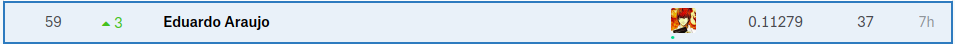